# ДЗ #5 (SVM)
# Жолковский Евгений

**Срок сдачи:** 23 декабря 2017, 06:00 <br> 
**Штраф за опоздание:** -2 балла после 06:00 23 декабря, -4 балла после 06:00 30 декабря, -6 баллов после 06:00 6 января

При отправлении ДЗ указывайте фамилию в названии файла<br>

Не забудте создать задание в Slack через /todo.

Используйте данный Ipython Notebook при оформлении домашнего задания.

In [1]:
import os
import Levenshtein

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.cross_validation import train_test_split
%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 6)

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Регрессия с SVM (3 балла)

Загрузите набор данных из *titanium.csv*<br/>
Мы будем решать задачу восстановления столбца 'y' по столбцу 'x'.

## Визуализация данных (1 балл)

Выполните стандартную предобработку данных (z-score) и выведите их на графике.

In [2]:
titanium = pd.read_csv('data/titanium.csv')
titanium.head()

,x,y
0,585.0,0.644
1,595.0,0.622
2,605.0,0.638
3,615.0,0.649
4,625.0,0.652


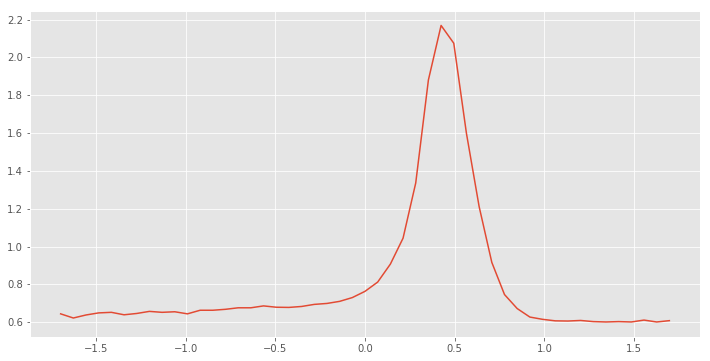

In [3]:
X = titanium.x.values
y = titanium.y.values
X = (X - X.mean()) / X.std()
X = X.reshape(-1,1)
plt.plot(X,y)
plt.show()

## Обучение моделей (2 балла)

Рассмотрите 3 ядра: 
* Линейное
* Полиномиальное (degree = 3, gamma = 6, coef0 = 1)
* RBF (gamma = 6, coef0 = 1)

Во всех случаях установить ширину трубки `epsilon=0.01`

Для каждого из ядер:
1. Пусть `C = np.logspace(-2, 2, 10)`. Постройте графики зависимости ошибки от параметра $C$ (ось графика со значениями параметра $C$ должна быть в логарифмической шкале). Ошибка измеряется как средняя абсолютная ошибка. 
2. Для наулучшего параметра $С$ каждого из ядер постройте график с данными и предстазанием по svm

В каких случаях возникает эффекты недообучения, переобучения?

In [4]:
C_space = np.logspace(-2, 2, 20)
MAE_lin = []
MAE_poly = []
MAE_rbf = []

for c in C_space:
    clf = SVR(C=c, kernel='linear', epsilon=0.01)
    clf.fit(X,y)
    y_pred = clf.predict(X)
    MAE_lin.append(mean_absolute_error(y, y_pred))
    
    
    clf = SVR(C=c, kernel='rbf', gamma=6, coef0=1, epsilon=0.01)
    clf.fit(X,y)
    y_pred = clf.predict(X)
    MAE_rbf.append(mean_absolute_error(y, y_pred))
    
        
    clf = SVR(C=c, kernel='poly', coef0=1, epsilon=0.01, degree = 3)
    clf.fit(X,y)
    y_pred = clf.predict(X)
    MAE_poly.append(mean_absolute_error(y, y_pred))

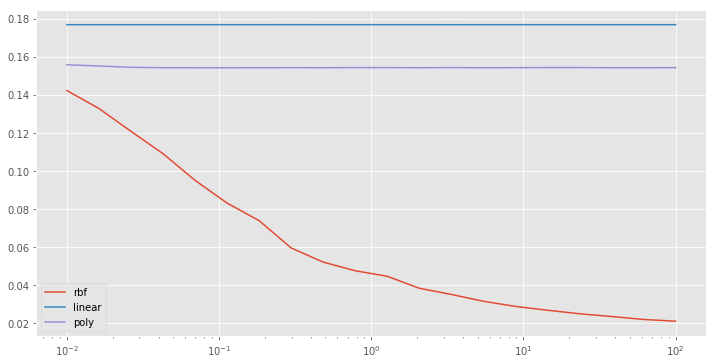

In [5]:
plt.plot(C_space, MAE_rbf, label='rbf')
plt.plot(C_space, MAE_lin, label='linear')
plt.plot(C_space, MAE_poly, label='poly')
plt.legend()
plt.xscale('log')
plt.show()

MAE linear:  0.176766497156
MAE rbf:  0.0209330691791
MAE poly:  0.154175792006


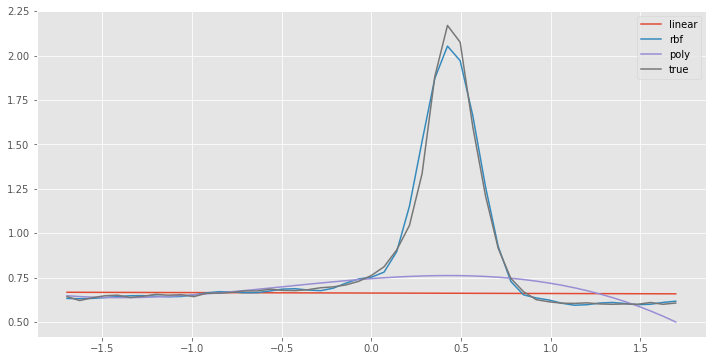

In [6]:
clf = SVR(C=100, kernel='linear', epsilon=0.01)
clf.fit(X,y)
y_pred = clf.predict(X)
print 'MAE linear: ', mean_absolute_error(y, y_pred)
plt.plot(X, y_pred, label='linear')

clf = SVR(C=100, kernel='rbf', gamma=6, coef0=1, epsilon=0.01)
clf.fit(X,y)
y_pred = clf.predict(X)
print 'MAE rbf: ',  mean_absolute_error(y, y_pred)
plt.plot(X, y_pred, label='rbf')


clf = SVR(C=100, kernel='poly', coef0=1, epsilon=0.01, degree = 3)
clf.fit(X,y)
y_pred = clf.predict(X)
print 'MAE poly: ',  mean_absolute_error(y, y_pred)
plt.plot(X, y_pred, label='poly')

plt.plot(X, y, label='true')
plt.legend()
plt.show()

# Определение языка слова (7 баллов)

В данном задании вам необходимо определить, на каком языке написано слово.

Вам будет дано два текста - первые предложения произведения "Война и Мир" на английком и испанском, разбитые на слова. У слов нет общепринятого числового представления, поэтому мы предлагаем вам реализовать собственноге ядро для SVM, основанное на редакторском расстоянии или [расстоянии Левинштейна](https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D1%81%D1%81%D1%82%D0%BE%D1%8F%D0%BD%D0%B8%D0%B5_%D0%9B%D0%B5%D0%B2%D0%B5%D0%BD%D1%88%D1%82%D0%B5%D0%B9%D0%BD%D0%B0). 

Имплементировать расстояние Леванштейна не нужно - можно взять любую доступную реализацию, например [здесь](https://github.com/toastdriven/pylev) или [здесь](https://github.com/ztane/python-Levenshtein).

## Загрузка (1 балл)

Загрузите данные из файлов *war_and_peace_es.txt* и *war_and_peace_en.txt*.<br/> 
В результате вы должны получить pandas.DataFrame со столбцами *index* | *word* | *label*, где *index* - это индекс pandas, *word* - это слово и *label* - это метка класса (0 или 1)

In [7]:
words_en = pd.read_csv('data/war_and_peace_en.txt', header=None)
words_es = pd.read_csv('data/war_and_peace_es.txt', header=None)
words_en['label'] = 1
words_es['label'] = 0
df = words_en.append(words_es, ignore_index=True)
df = df.rename(columns={ df.columns[0]: "word" })
df.head()

,word,label
0,war,1
1,and,1
2,peace,1
3,leo,1
4,tolstoy,1


## Подготовка данных (2 балла)

Особенностью пользовательского ядра в sklean.SVC является то, что на вход оно должно принимать именно вектора чисел.<br/>
В нашем случае это будут индексы соответствующих слов из корпуса. То есть вместо вектора ['treat', 'celebrit', 'prince', ...] на вход в ядро подается вектор из индексов [9209, 11145, 7735, ...] с помощью которых вы будете находить сами слова.

Прежде чем мы начнем строить ядро, надо подготовить данные. Для этого:
1. Задайте переменную RND_SEED, которая будет использоваться в любых генераторах случайных чисел в вашем коде (обычно 
"random_seed")
2. Случайным образом перемешайте и заново проиндексируйте таблицу, полученную выше (используйте методы df.sample() и df.reset_index())
3. Ядро может вычисляться достаточно долго, поэтому можете урезать таблицу, но оставить в ней не менее 1000 слов.
4. Разбейте данные на обучающую и контрольную выборку в пропорции 60/40

В результате вы должны получить вектор-столбец X_train, X_test с **индексами** слов и векторы y_train, y_test с метками классов.

## Реализация через передачу индексов
Я реализовал передачу слов в ядро через индексы, это работает существенно медленней, чем если сразу передавать слова

In [8]:
# RND_SEED = 10
# df_sample = df.sample(1000, random_state=RND_SEED)
# df_sample = df_sample.reset_index()

# train_idx, test_idx = train_test_split(range(df_sample.shape[0]), test_size=0.4, random_state=RND_SEED)
# X_train = df_sample.iloc[train_idx].index.values
# y_train = df_sample.iloc[train_idx].label.values

# X_test = df_sample.iloc[test_idx].index.values
# y_test = df_sample.iloc[test_idx].label.values

In [9]:
# def string_kernel(U, V):
#     D = np.zeros((U.shape[0],V.shape[0]))
#     for i in xrange(U.shape[0]):
#         for j in xrange(V.shape[0]):
#             D[i,j] = Levenshtein.distance(df_sample.loc[U[i]].word, df_sample.loc[V[j]].word)
#     return np.exp(-D ** 2 / (2 ))


In [10]:
RND_SEED = 10
df_sample = df.sample(1000, random_state=RND_SEED)
df_sample = df_sample.reset_index()

train_idx, test_idx = train_test_split(range(df_sample.shape[0]), test_size=0.4, random_state=RND_SEED)
X_train = df_sample.iloc[train_idx].word.values
y_train = df_sample.iloc[train_idx].label.values

X_test = df_sample.iloc[test_idx].word.values
y_test = df_sample.iloc[test_idx].label.values

## Расчет ядра (3 балла)

In [11]:
def string_kernel(U, V):
    D = np.zeros((U.shape[0],V.shape[0]))
    for i in xrange(U.shape[0]):
        for j in xrange(V.shape[0]):
            D[i,j] = Levenshtein.distance(U[i], V[j])
    return np.exp(-D ** 2 / (2 ))



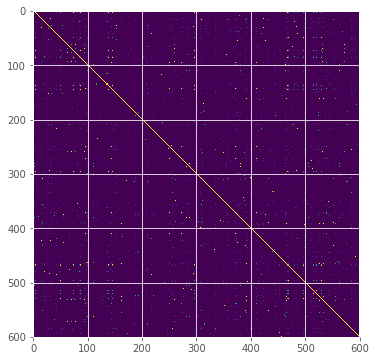

In [12]:
G = string_kernel(X_train, X_train)
plt.imshow(G)
plt.show()

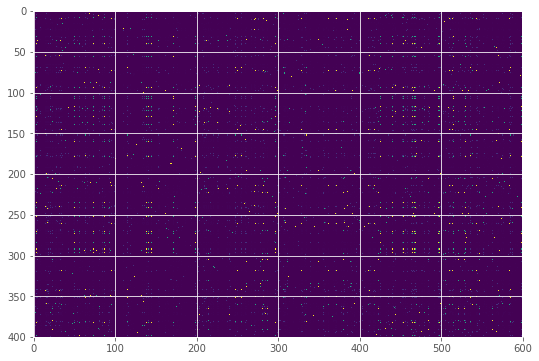

In [13]:
T = string_kernel(X_test, X_train)
plt.imshow(T)
plt.show()

In [14]:
C_space = np.logspace(-3,3,100)

## Оценка качества (1 балл)

Обучите метод опорных векторов с различными значениями параметра штрафа $C$.<br/>
Для каждого значения выведите accuracy на обучащюей и контрольной выборке.

Постарайтесь достичь качества в 70% на тестовой выборке

In [15]:
acc_test = []
acc_train = []

for c in C_space:
    clf = SVC(C=c, kernel='precomputed')
    clf.fit(G, y_train)
    y_pred_test = clf.predict(T)
    y_pred_train = clf.predict(G)
        
    acc_test.append(accuracy_score(y_test,y_pred_test))
    acc_train.append(accuracy_score(y_train,y_pred_train))


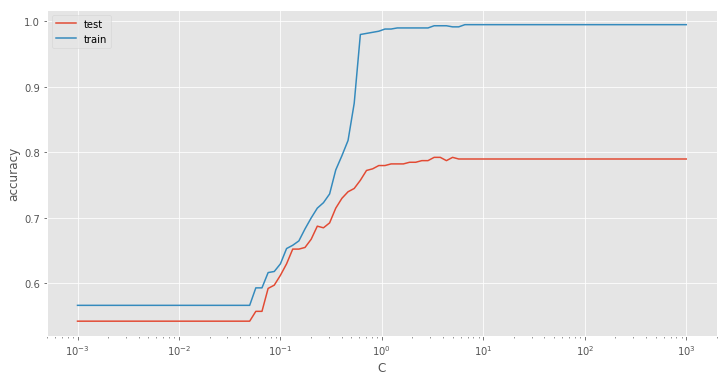

In [16]:
plt.plot(C_space, acc_test)
plt.plot(C_space, acc_train)
plt.legend(['test', 'train'])
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('accuracy')
plt.show()

In [17]:
print 'test_best: ', max(acc_test)
print 'train_best: ', max(acc_train)

test_best:  0.7925
train_best:  0.995
